# Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import probplot, boxcox
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## Load the csv

In [2]:
df = pd.read_csv(r'housing.csv')

# Initial Data Investigation

## Dataframe Shape

In [3]:
df.shape

(20640, 10)

## Check the first 5 rows

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Check the last 5 rows

In [6]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


## Check the data types of each column

In [7]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

## Dataframe Statistics

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Initial Data Investigation Findings
- The dataset contains 10 columns (features) and 20,640 rows (samples)
- The 'ocean_proximity' variable is a categorical variable and not a numerical type like the remaining columns
- There may be more useful features that could be engineered from multiple features

# Data Cleaning

## Check for missing values
The 'total_bedrooms' column contains missing values

In [9]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

## View all rows where 'total_bedrooms' is null
There is 207 rows of data where total_bedrooms is null

In [10]:
df[df['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


## If we want to drop (but we will impute instead)

In [11]:
#df.dropna()

## Impute with mean
Rather than disposing 207 samples of data, we can impute the missing values using an average value. First, we will test the mean value.

In [12]:
mean_val = df['total_bedrooms'].mean()
print(mean_val)
df['total_bedrooms'].fillna(mean_val, inplace=True)

537.8705525375618


In [13]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

## Example of data with mean imputted

In [14]:
df.iloc[290]

longitude                -122.16
latitude                   37.77
housing_median_age          47.0
total_rooms               1256.0
total_bedrooms        537.870553
population                 570.0
households                 218.0
median_income              4.375
median_house_value      161900.0
ocean_proximity         NEAR BAY
Name: 290, dtype: object

## Drop duplicate data

In [15]:
df.drop_duplicates()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Histograms

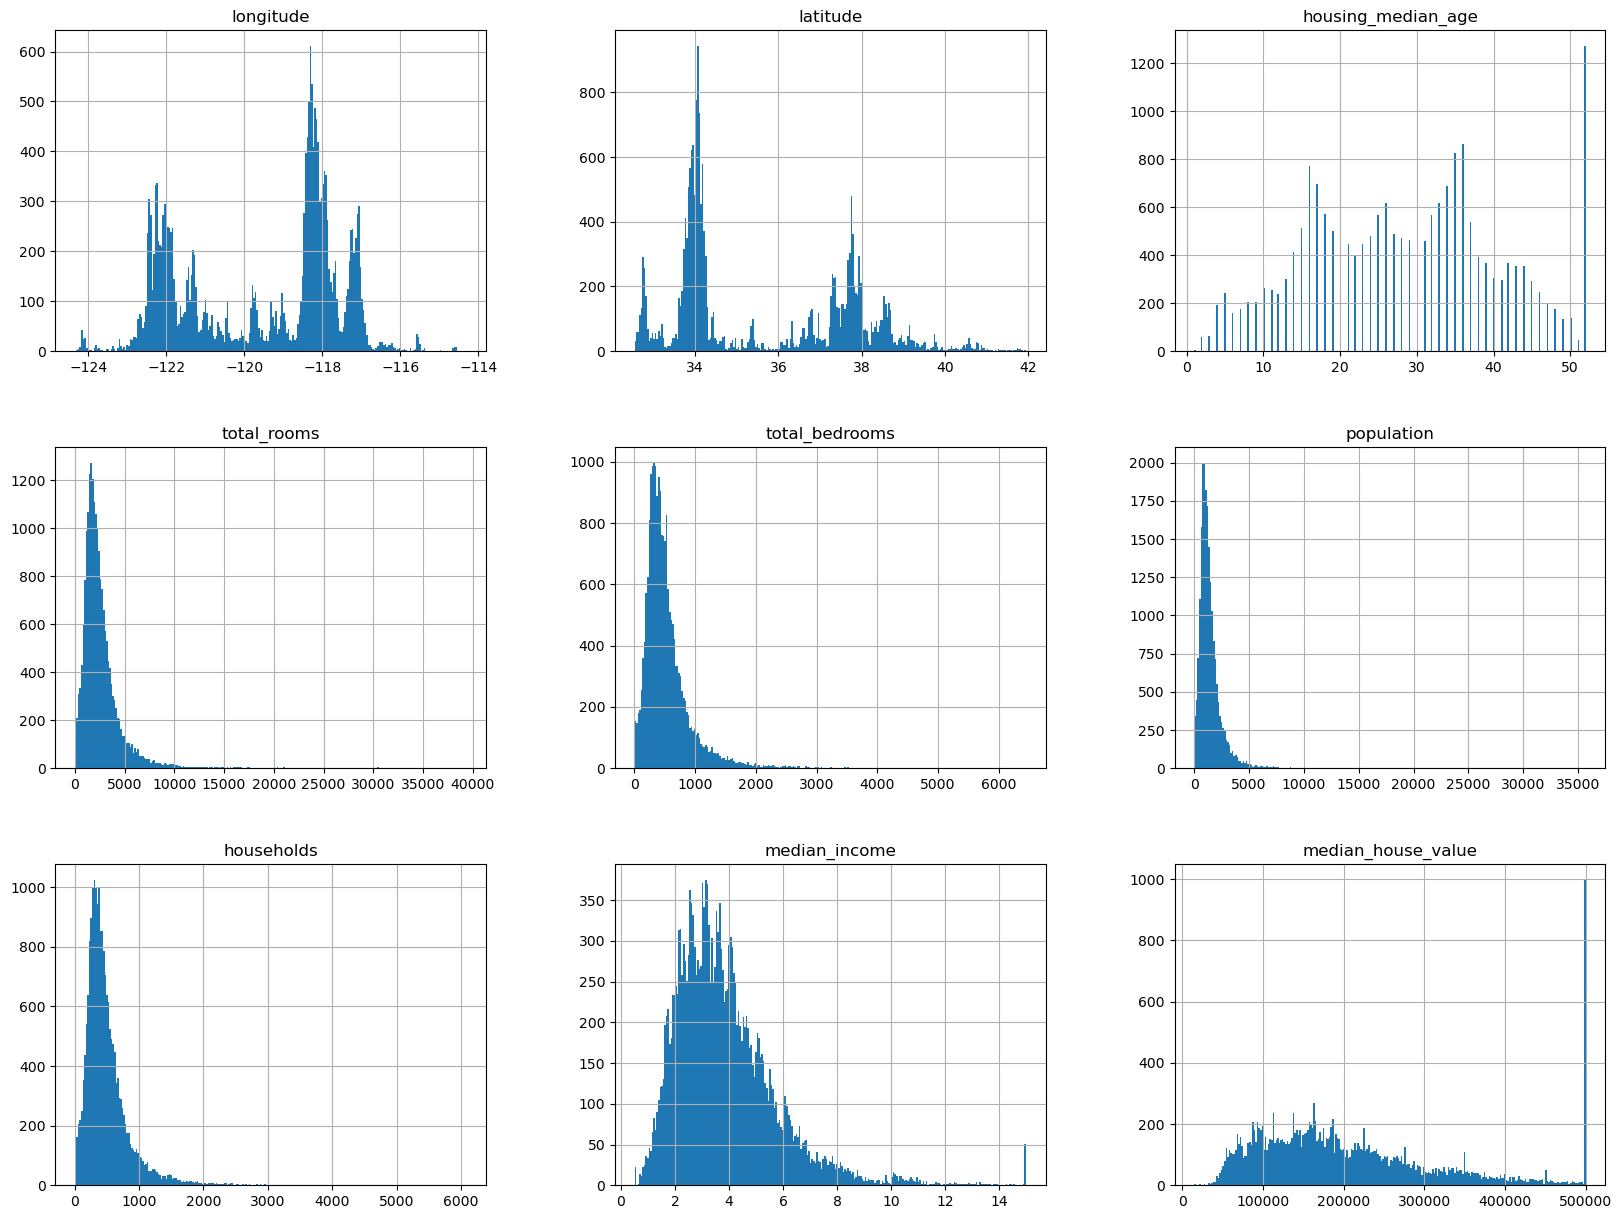

In [16]:
df.hist(bins=250, figsize=(20, 15));

When looking at 'median_house_value', there's an unusually high frequency at 500,000. This could indicate that the median house value was capped at 500,000, which could wrongly represent the data distribution and lead to incorrect predictions. Because of this, we can remove all values above 500,000.

In [17]:
df = df[df['median_house_value'] < 500000]

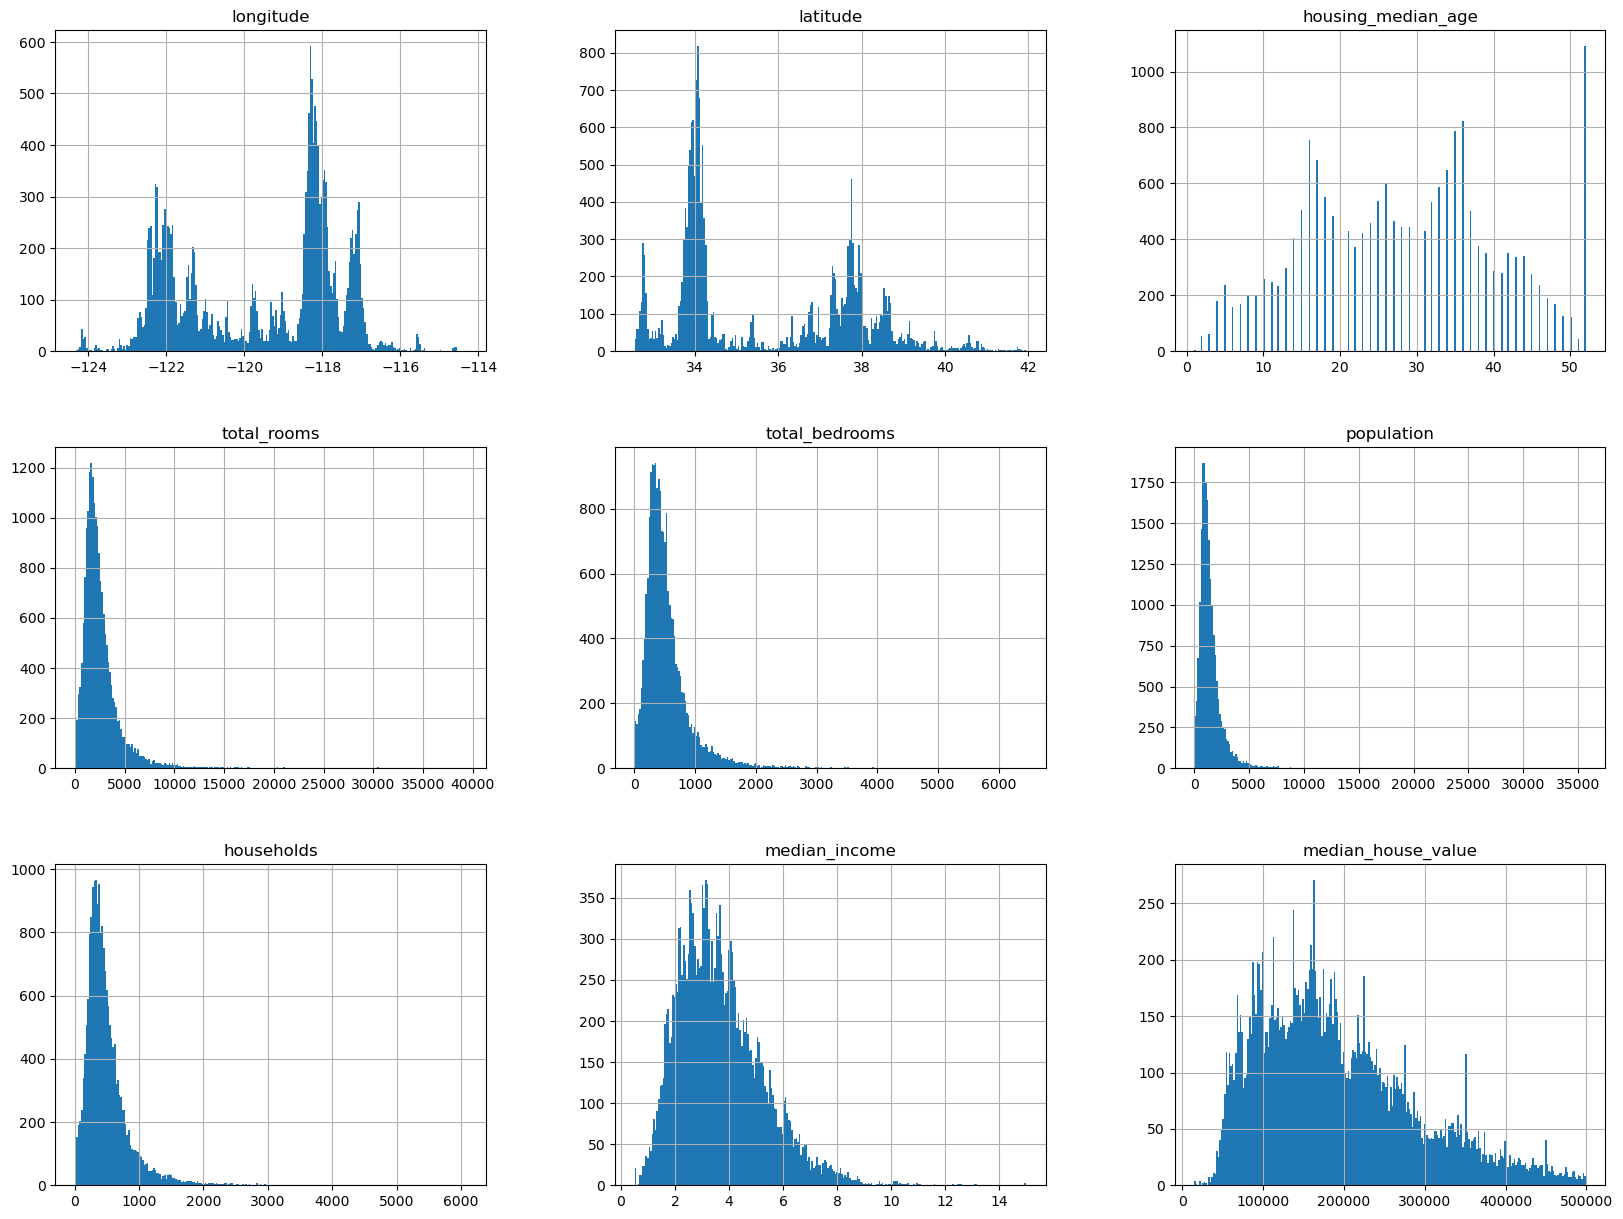

In [18]:
df.hist(bins=250, figsize=(20, 15));

'housing_median_age' appears horizontally symetrical in its distribution, except for a similar spike at the highest values. To correct the distribution, we can remove these high values.

In [19]:
df = df[df['housing_median_age'] < 52]

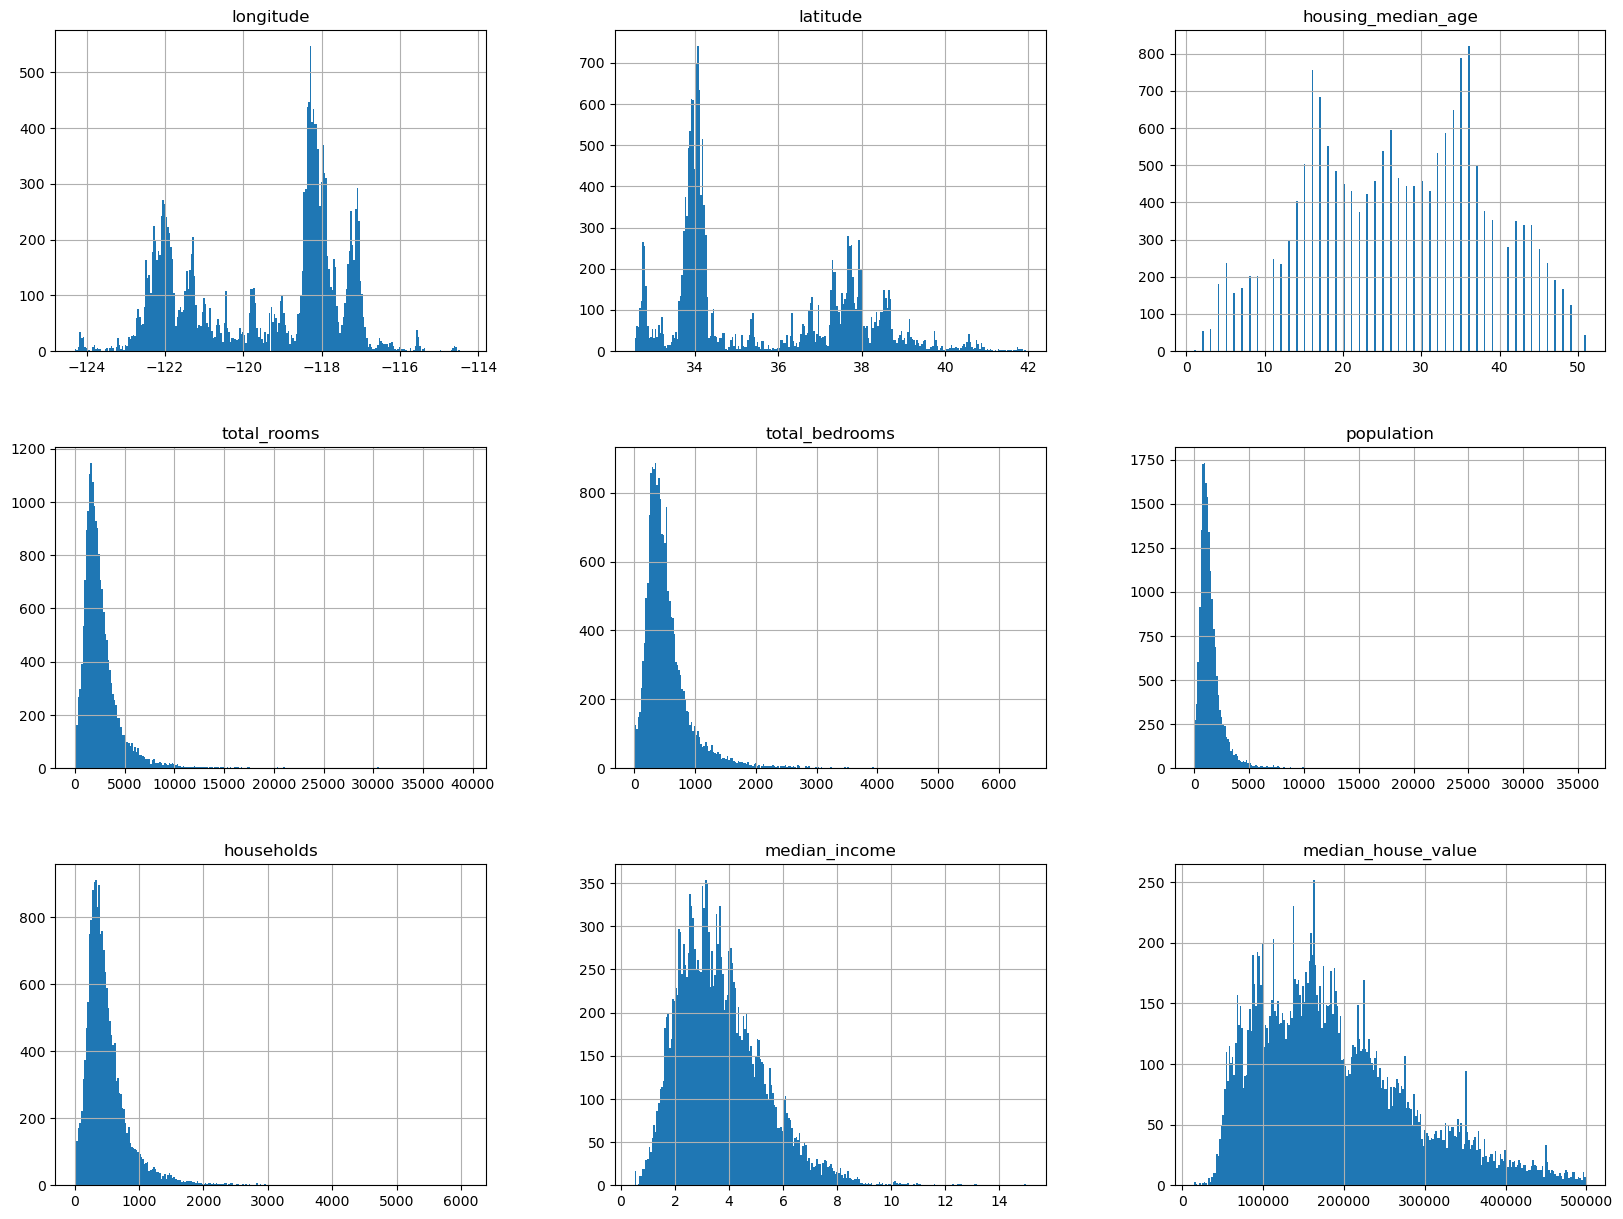

In [20]:
df.hist(bins=250, figsize=(20, 15));

# Feature Engineering

We can create some new features, such as:
- 'rooms_per_household', by dividing the 'total_rooms' by 'households'
- 'bedrooms_per_room', by dividing 'total_bedrooms' by 'total_rooms'
- 'population_per_household', by dividing 'population' by 'households'

We can assess how well correlated this data is with the 'median_house_value' to see which features we should keep or drop.

In [21]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']

df_no_op = df.drop(['ocean_proximity'], axis=1)
corr_matrix = df_no_op.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.664340
total_rooms                 0.153887
rooms_per_household         0.115232
households                  0.100565
total_bedrooms              0.079425
population                  0.022542
housing_median_age          0.014121
population_per_household   -0.020193
longitude                  -0.022901
latitude                   -0.171565
bedrooms_per_room          -0.210477
Name: median_house_value, dtype: float64

As 'rooms_per_household' is more correlated with 'median_house_value' than 'households' used to engineer it, **'households' can be removed** with its low correlation.

**'total_bedrooms' can be removed** due to its very low correlation with 'median_house_value' after being used to engineer 'bedrooms_per_room' which has a very high correlation.

Engineered feature, **'population_per_household', can be removed**, due to its low correlation with 'median_house_value'.

In [22]:
# Drop the original features
# households, total_bedrooms, population_per_household
# df = df.drop(['population', 'housing_median_age', 'population_per_household'], axis=1)
# df = df.drop(['households', 'total_bedrooms', 'population_per_household'], axis=1)
df = df.drop(['total_bedrooms', 'population', 'housing_median_age', 'population_per_household'], axis=1)

df_no_op = df.drop(['ocean_proximity'], axis=1)
corr_matrix = df_no_op.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.664340
total_rooms            0.153887
rooms_per_household    0.115232
households             0.100565
longitude             -0.022901
latitude              -0.171565
bedrooms_per_room     -0.210477
Name: median_house_value, dtype: float64

### Removing anomalies

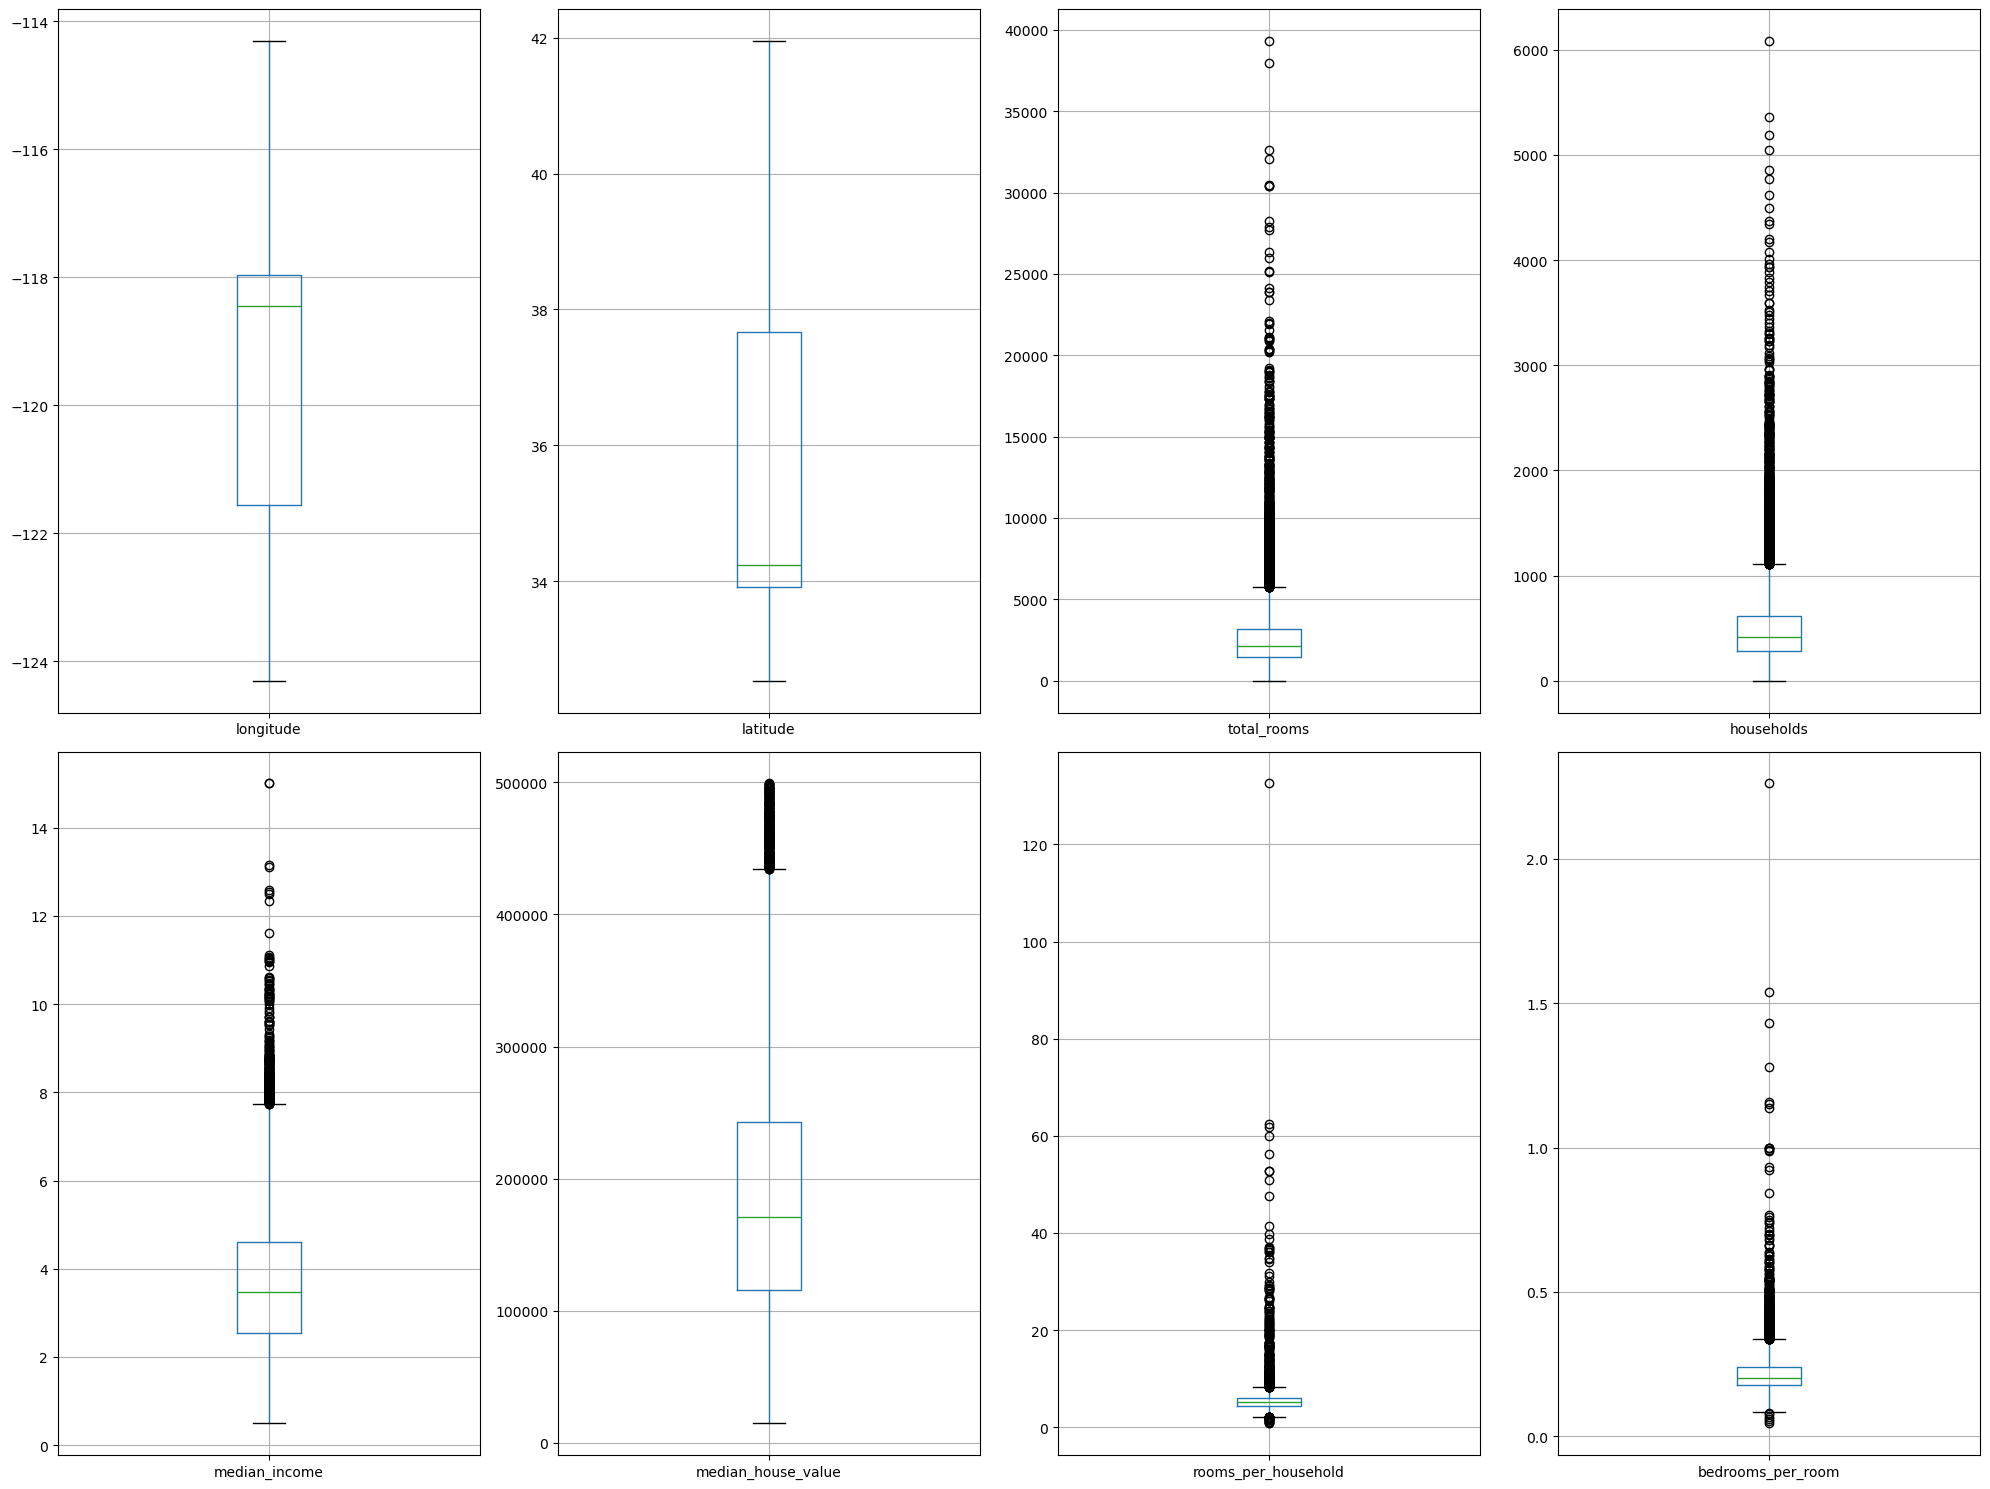

In [26]:
df_no_op = df.drop(['ocean_proximity'], axis=1)

# Create a figure and a grid of subplots
fig, axes = plt.subplots(len(df_no_op.columns)//4, 4, figsize=(20, 15))

# Flatten the array of axes
axes = axes.flatten()

# Loop over the columns of the dataframe and the flat array of axes
for ax, col in zip(axes, df_no_op.columns):
    # Create a boxplot for each column on a separate subplot
    df_no_op.boxplot(column=col, ax=ax)

# Remove any unused subplots
for i in range(len(df_no_op.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

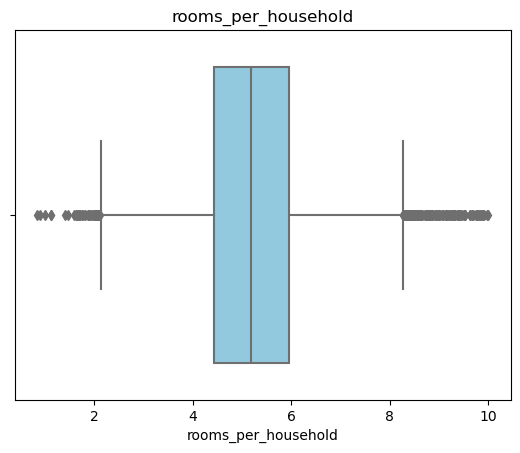

(18345, 9)


In [29]:
df = df[df['rooms_per_household'] <= 10]

sns.boxplot(x=df['rooms_per_household'], color='skyblue')
plt.title('rooms_per_household')
plt.show()

print(df.shape)

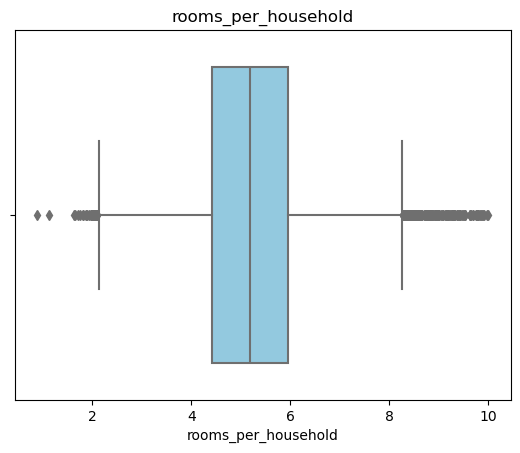

(18306, 9)


In [34]:
# remove anomalies
df = df[df['bedrooms_per_room'] <= 0.75]

sns.boxplot(x=df['rooms_per_household'], color='skyblue')
plt.title('rooms_per_household')
plt.show()

print(df.shape)

# # apply square-root
# df.loc[:, 'bedrooms_per_room'] = np.sqrt(df['bedrooms_per_room'])

## Test for skew

In [36]:
for col in df.select_dtypes(include=[np.number]).columns:
    skewness = df[col].skew()
    if skewness > 1:
        print(f"Positive Skew,  {skewness:.2f},  {col}")
    elif skewness < -1:
        print(f"Negative Skew,  {skewness:.2f},  {col}")
    else:
        print(f"Minimal Skew,   {skewness:.2f},  {col}")

Minimal Skew,   -0.35,  longitude
Minimal Skew,   0.53,  latitude
Positive Skew,  4.22,  total_rooms
Positive Skew,  3.40,  households
Minimal Skew,   0.85,  median_income
Minimal Skew,   0.82,  median_house_value
Minimal Skew,   0.31,  rooms_per_household
Positive Skew,  1.51,  bedrooms_per_room


'bedrooms_per_room' has the highest skew and should be corrected.

## Applying transformations to bedrooms_per_room

EDIT - Understanding probability plot

In [37]:
# x = np.log(df['bedrooms_per_room'])
# print(f'log: {x.skew()}')
# probplot(x, dist="norm", plot=plt)
# plt.title('Probability plot of bedrooms_per_room')
# plt.show()

# x = np.sqrt(df['bedrooms_per_room'])
# print(f'sqrt: {x.skew()}')
# probplot(x, dist="norm", plot=plt)
# plt.title('Probability plot of bedrooms_per_room')
# plt.show()

# boxcox_x, lambda_ = boxcox(df['bedrooms_per_room'])
# print(f'Box-cox: {lambda_}')
# probplot(boxcox_x, dist="norm", plot=plt)
# plt.title('Probability plot of bedrooms_per_room')
# plt.show()

Maybe leave it, the probablitity plot may not be sufficient

<!-- Transformation Results:
log:      0.8680607951109436
sqrt:     4.850183404126622
Box-cox: -0.2980048976549959

The box-cox provided the best results, however, the probability plot is still not ideal. We can remove the samples that are potentially anomalies from the 'bedrooms_per_room' column. -->

In [33]:
# x = np.log(df_rooms_per_household_mod['rooms_per_household'])
# print(f'log: {x.skew()}')
# probplot(x, dist="norm", plot=plt)
# plt.title('Probability plot of total_bedrooms')
# plt.show()

# x = np.sqrt(df_rooms_per_household_mod['rooms_per_household'])
# print(f'sqrt: {x.skew()}')
# probplot(x, dist="norm", plot=plt)
# plt.title('Probability plot of total_bedrooms')
# plt.show()

# boxcox_x, lambda_ = boxcox(df_rooms_per_household_mod['rooms_per_household'])
# print(f'Box-cox: {lambda_}')
# probplot(boxcox_x, dist="norm", plot=plt)
# plt.title('Probability plot of total_bedrooms')
# plt.show()

<!-- After removing some data, applying a square-root transformation provides the lowest skew (-0.054122564845200706) and now matches the normal distribution better also.  -->

### Check for anomalies (boxplots again)

In [38]:
# # Create a boxplot for each column
# for column in df:
#     # Check if the column data type is numeric
#     if pd.api.types.is_numeric_dtype(df[column]):
#         plt.figure()
#         sns.boxplot(x=df[column], color='skyblue')
#         plt.title(column)
#         plt.show()

The features that may have anomalies are total_bedrooms, population, median_income, and rooms_per_household

### Remove anomalies

#### population

In [39]:
# df = df[df['population'] <= 20000]

# sns.boxplot(x=df['population'], color='skyblue')
# plt.title('population')
# plt.show()

# print(df.shape)

In [40]:
df

,longitude,latitude,total_rooms,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,880.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591
1,-122.22,37.86,7099.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797
8,-122.26,37.84,2555.0,595.0,2.0804,226700.0,NEAR BAY,4.294118,0.260274
15,-122.26,37.85,1120.0,264.0,2.1250,140000.0,NEAR BAY,4.242424,0.252679
18,-122.26,37.84,2239.0,419.0,1.9911,158700.0,NEAR BAY,5.343675,0.203216
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,1665.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625
20636,-121.21,39.49,697.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208
20637,-121.22,39.43,2254.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173
20638,-121.32,39.43,1860.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892


### Encode ocean_proximity

In [41]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [42]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     8291
INLAND        6137
NEAR OCEAN    2314
NEAR BAY      1562
ISLAND           2
Name: count, dtype: int64

In [43]:
one_hot_encoder = OneHotEncoder()

ocean_proximity_one_hot = one_hot_encoder.fit_transform(df[['ocean_proximity']])

In [44]:
ocean_proximity_one_hot

<18306x5 sparse matrix of type '<class 'numpy.float64'>'
	with 18306 stored elements in Compressed Sparse Row format>

In [45]:
ocean_proximity_one_hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [46]:
# Convert the numpy array to a DataFrame
categories_df = pd.DataFrame(ocean_proximity_one_hot.toarray(), columns=one_hot_encoder.categories_[0], index=df.index) # its important to ensure the indexes match!

# print(df.shape)
# print(categories_df.shape)
# print(df.isnull().sum())
# print(categories_df.isnull().sum())

# Concatenate the new DataFrame with the original DataFrame
df = pd.concat([df.drop('ocean_proximity', axis=1), categories_df], axis=1)


# housing_data2 = pd.concat(housing_data2, ocean_data, axis=1)

# print(df.isnull().sum())


In [47]:
categories_df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0
15,0.0,0.0,0.0,1.0,0.0
18,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [48]:
df

,longitude,latitude,total_rooms,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,880.0,126.0,8.3252,452600.0,6.984127,0.146591,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,7099.0,1138.0,8.3014,358500.0,6.238137,0.155797,0.0,0.0,0.0,1.0,0.0
8,-122.26,37.84,2555.0,595.0,2.0804,226700.0,4.294118,0.260274,0.0,0.0,0.0,1.0,0.0
15,-122.26,37.85,1120.0,264.0,2.1250,140000.0,4.242424,0.252679,0.0,0.0,0.0,1.0,0.0
18,-122.26,37.84,2239.0,419.0,1.9911,158700.0,5.343675,0.203216,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,1665.0,330.0,1.5603,78100.0,5.045455,0.224625,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,697.0,114.0,2.5568,77100.0,6.114035,0.215208,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,2254.0,433.0,1.7000,92300.0,5.205543,0.215173,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,1860.0,349.0,1.8672,84700.0,5.329513,0.219892,0.0,1.0,0.0,0.0,0.0


### Check for correlations

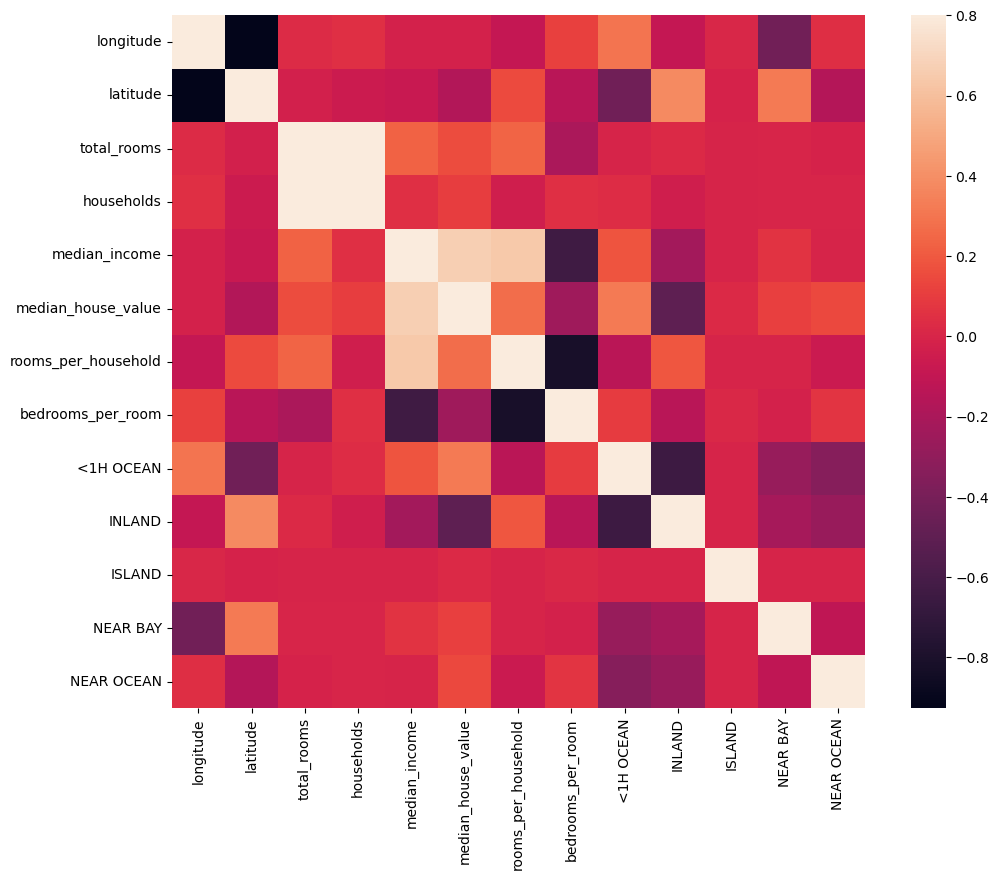

In [49]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Based on this correlation matrix, the longitude and latitude are highly correlated. We could consider removing one of these features as a multicollinearity is present. It would appear that latitude has a higher skew than the longitude, so we will drop the latitude feature.

In [50]:
df

,longitude,latitude,total_rooms,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,880.0,126.0,8.3252,452600.0,6.984127,0.146591,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,7099.0,1138.0,8.3014,358500.0,6.238137,0.155797,0.0,0.0,0.0,1.0,0.0
8,-122.26,37.84,2555.0,595.0,2.0804,226700.0,4.294118,0.260274,0.0,0.0,0.0,1.0,0.0
15,-122.26,37.85,1120.0,264.0,2.1250,140000.0,4.242424,0.252679,0.0,0.0,0.0,1.0,0.0
18,-122.26,37.84,2239.0,419.0,1.9911,158700.0,5.343675,0.203216,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,1665.0,330.0,1.5603,78100.0,5.045455,0.224625,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,697.0,114.0,2.5568,77100.0,6.114035,0.215208,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,2254.0,433.0,1.7000,92300.0,5.205543,0.215173,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,1860.0,349.0,1.8672,84700.0,5.329513,0.219892,0.0,1.0,0.0,0.0,0.0


In [51]:
df = df.drop(['latitude'], axis=1)
df

,longitude,total_rooms,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,880.0,126.0,8.3252,452600.0,6.984127,0.146591,0.0,0.0,0.0,1.0,0.0
1,-122.22,7099.0,1138.0,8.3014,358500.0,6.238137,0.155797,0.0,0.0,0.0,1.0,0.0
8,-122.26,2555.0,595.0,2.0804,226700.0,4.294118,0.260274,0.0,0.0,0.0,1.0,0.0
15,-122.26,1120.0,264.0,2.1250,140000.0,4.242424,0.252679,0.0,0.0,0.0,1.0,0.0
18,-122.26,2239.0,419.0,1.9911,158700.0,5.343675,0.203216,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,1665.0,330.0,1.5603,78100.0,5.045455,0.224625,0.0,1.0,0.0,0.0,0.0
20636,-121.21,697.0,114.0,2.5568,77100.0,6.114035,0.215208,0.0,1.0,0.0,0.0,0.0
20637,-121.22,2254.0,433.0,1.7000,92300.0,5.205543,0.215173,0.0,1.0,0.0,0.0,0.0
20638,-121.32,1860.0,349.0,1.8672,84700.0,5.329513,0.219892,0.0,1.0,0.0,0.0,0.0


In [54]:
df = df.drop(['ISLAND'], axis=1)
df

,longitude,total_rooms,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,880.0,126.0,8.3252,452600.0,6.984127,0.146591,0.0,0.0,1.0,0.0
1,-122.22,7099.0,1138.0,8.3014,358500.0,6.238137,0.155797,0.0,0.0,1.0,0.0
8,-122.26,2555.0,595.0,2.0804,226700.0,4.294118,0.260274,0.0,0.0,1.0,0.0
15,-122.26,1120.0,264.0,2.1250,140000.0,4.242424,0.252679,0.0,0.0,1.0,0.0
18,-122.26,2239.0,419.0,1.9911,158700.0,5.343675,0.203216,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,1665.0,330.0,1.5603,78100.0,5.045455,0.224625,0.0,1.0,0.0,0.0
20636,-121.21,697.0,114.0,2.5568,77100.0,6.114035,0.215208,0.0,1.0,0.0,0.0
20637,-121.22,2254.0,433.0,1.7000,92300.0,5.205543,0.215173,0.0,1.0,0.0,0.0
20638,-121.32,1860.0,349.0,1.8672,84700.0,5.329513,0.219892,0.0,1.0,0.0,0.0


In [55]:
df.isnull().any()

longitude              False
total_rooms            False
households             False
median_income          False
median_house_value     False
rooms_per_household    False
bedrooms_per_room      False
<1H OCEAN              False
INLAND                 False
NEAR BAY               False
NEAR OCEAN             False
dtype: bool

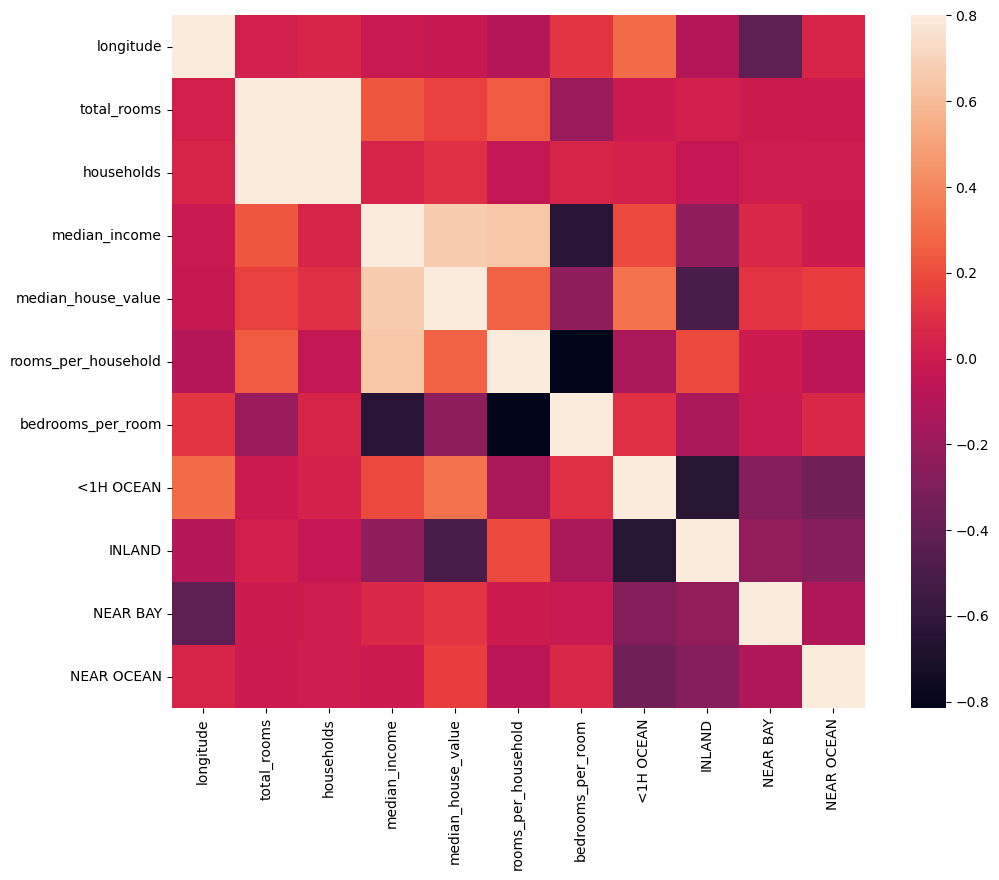

In [56]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Could remove more features...

In [57]:
from sklearn.model_selection import train_test_split

# Define features and target
y = df['median_house_value']
X = df.drop('median_house_value', axis=1)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature scaling

In [58]:
from sklearn.preprocessing import StandardScaler

print(X_train.iloc[0])

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train[0])

longitude              -121.51000
total_rooms            1613.00000
households              266.00000
median_income             4.25000
rooms_per_household       6.06391
bedrooms_per_room         0.16429
<1H OCEAN                 0.00000
INLAND                    1.00000
NEAR BAY                  0.00000
NEAR OCEAN                0.00000
Name: 12587, dtype: float64
[-1.01725608 -0.47887833 -0.63626718  0.36141643  0.71887195 -0.90810735
 -0.90805845  1.40370417 -0.30375193 -0.38108479]


### Train model

In [59]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True)
model = reg.fit(X_train, y_train)

prediction = model.predict(X_test)

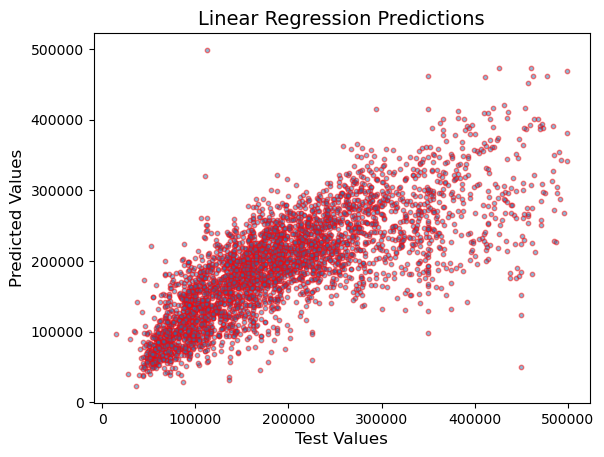

R^2 Score: 0.5975088264146593
Mean Absolute Error: 44421.87516266979
Mean Squared Error: 3791313553.6805506
Root Mean Squared Error: 61573.643336094305
Mean Absolute Percentage Error: 26.15678644401046%


In [60]:
fig, ax = plt.subplots()

ax.scatter(y_test, prediction, alpha=0.5, edgecolors='r', s=10)
ax.set_title('Linear Regression Predictions', fontsize=14)
ax.set_xlabel('Test Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)
plt.show()

r2 = r2_score(y_test, prediction)
print(f'R^2 Score: {r2}')
mae = mean_absolute_error(y_test, prediction)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, prediction)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
mape = np.mean(np.abs((y_test - prediction) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

In [61]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Train the model using the training sets
dt.fit(X_train, y_train)

# Make predictions using the testing set
prediction = dt.predict(X_test)

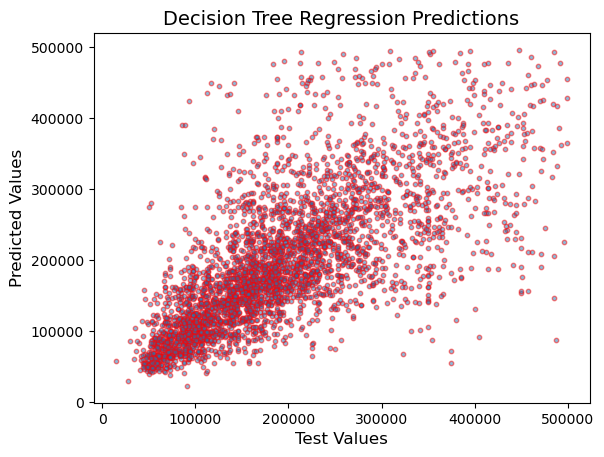

R^2 Score: 0.41666608247053805
Mean Absolute Error: 50529.16466411797
Mean Squared Error: 5494783321.955489
Root Mean Squared Error: 74126.80569102846
Mean Absolute Percentage Error: 28.680887444595566%


In [62]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction, alpha=0.5, edgecolors='r', s=10)
ax.set_title('Decision Tree Regression Predictions', fontsize=14)
ax.set_xlabel('Test Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)
plt.show()

r2 = r2_score(y_test, prediction)
print(f'R^2 Score: {r2}')
mae = mean_absolute_error(y_test, prediction)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, prediction)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
mape = np.mean(np.abs((y_test - prediction) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

In [63]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=500, random_state=42)

# Train the model using the training sets
rf.fit(X_train, y_train)

# Make predictions using the testing set
prediction = rf.predict(X_test)

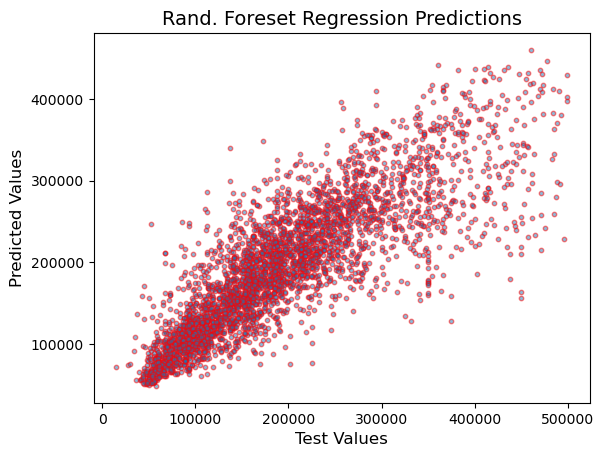

R^2 Score: 0.7054985766665002
Mean Absolute Error: 36597.987160567995
Mean Squared Error: 2774091237.620068
Root Mean Squared Error: 52669.642467175225
Mean Absolute Percentage Error: 21.207103260845237%


In [64]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction, alpha=0.5, edgecolors='r', s=10)
ax.set_title('Rand. Foreset Regression Predictions', fontsize=14)
ax.set_xlabel('Test Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)
plt.show()

r2 = r2_score(y_test, prediction)
print(f'R^2 Score: {r2}')
mae = mean_absolute_error(y_test, prediction)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, prediction)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
mape = np.mean(np.abs((y_test - prediction) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

# R^2 Score: 0.779030066240707
# Mean Absolute Error: 36770.76824638746
# Mean Squared Error: 3031770206.138931
# Root Mean Squared Error: 55061.512929985234
# Mean Absolute Percentage Error: 20.43322235238895%

# removed values equal to 500,000 house value
# R^2 Score: 0.7346097034744508
# Mean Absolute Error: 33915.126562901976
# Mean Squared Error: 2459027466.140827
# Root Mean Squared Error: 49588.5820138147
# Mean Absolute Percentage Error: 19.478135922663732%

# with 500 estimators:
# R^2 Score: 0.7349318861418735
# Mean Absolute Error: 33849.51390583998
# Mean Squared Error: 2456042217.476202
# Root Mean Squared Error: 49558.47271129531
# Mean Absolute Percentage Error: 19.399200314330763%

exploratory data analysis
clean data (remove null values)
encode (one-hot array)
*
**
***
****
split dataset into test and train
scale data (using train data only as reference)
create and train model (Decision Tree Regressor, SVM Regressor, Random Forest Regressor)
assess model accuracy


* remove anomalies
** feature creation
*** feature removal
**** check and correct for skew

In [76]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf,
                         X_train,
                         y_train,
                         scoring='neg_mean_squared_error',
                         cv=5)

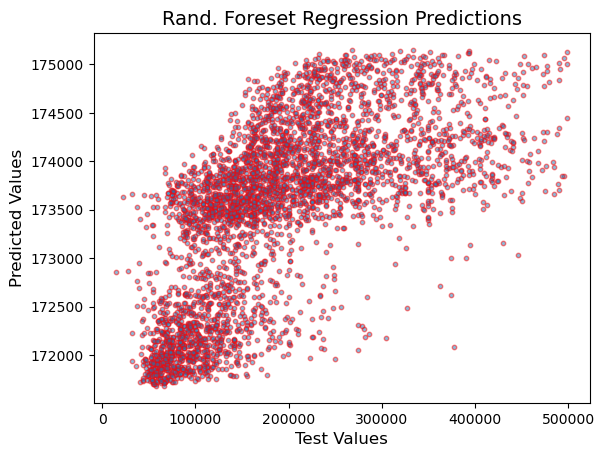

R^2 Score: -0.02565554117219926
Mean Absolute Error: 77170.43891132947
Mean Squared Error: 9827866304.652569
Root Mean Squared Error: 99135.59554797948
Mean Absolute Percentage Error: 50.96015782910908%


In [77]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction, alpha=0.5, edgecolors='r', s=10)
ax.set_title('Rand. Foreset Regression Predictions', fontsize=14)
ax.set_xlabel('Test Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)
plt.show()

r2 = r2_score(y_test, prediction)
print(f'R^2 Score: {r2}')
mae = mean_absolute_error(y_test, prediction)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, prediction)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
mape = np.mean(np.abs((y_test - prediction) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

In [78]:
from sklearn.model_selection import GridSearchCV

parameter_grid = [
    {'n_estimators': [10, 100],
     'max_features': [2, 8 ,13],
     'max_depth': [2, 10, None],
     }
]

grid_search = GridSearchCV(rf,
                           parameter_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(n_estimators=500, random_state=42),
             param_grid=[{'max_depth': [2, 10, None],
                          'max_features': [2, 8, 13],
                          'n_estimators': [10, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [72]:
from sklearn.svm import SVR

svr = SVR(kernel="rbf")
svr.fit(X_train, y_train)

prediction = svr.predict(X_test)

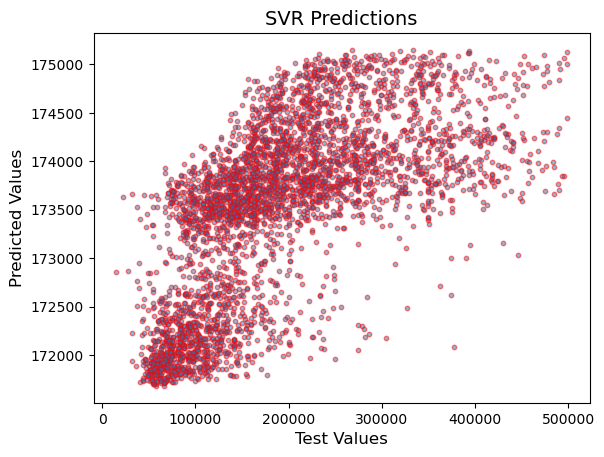

R^2 Score: -0.02565554117219926
Mean Absolute Error: 77170.43891132947
Mean Squared Error: 9827866304.652569
Root Mean Squared Error: 99135.59554797948
Mean Absolute Percentage Error: 50.96015782910908%


In [73]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction, alpha=0.5, edgecolors='r', s=10)
ax.set_title('SVR Predictions', fontsize=14)
ax.set_xlabel('Test Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)
plt.show()

r2 = r2_score(y_test, prediction)
print(f'R^2 Score: {r2}')
mae = mean_absolute_error(y_test, prediction)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, prediction)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
mape = np.mean(np.abs((y_test - prediction) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

In [165]:
# # Set the display format to non-scientific notation
# pd.set_option('display.float_format', lambda x: '%.2f' % x)